# Practice 4
Today we need to generate graphs.
To generate graphs, we need Matlplotlib.pyplot, which is based on numpy.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

You have 4 files to load:
- people.csv
- people_embeddings.npy
- connections.csv
- connections_embeddings.npy

You know how to load csv files using pandas. npy files are files from numpy, containing matrices, you can load them with np.load(filename).

In [3]:
people = pd.read_csv('people.csv')
people_embeddings = np.load('people_embeddings.npy')

print(f"Registering table and embeddings loaded, dimensions are: {people.shape} and {people_embeddings.shape}")
people.head()

Registering table and embeddings loaded, dimensions are: (20, 5) and (20, 256)


,names,surnames,ips,passwords,logins
0,Ava,BORUCH,192.34824.8.57,O@!n7[dBE,ava_boruch@email.com
1,Zissy,RONAN,209.15789.173.175,"J}d,",zissy_ronan@email.com
2,Nyla,JORGE,158.45077.21.161,/~=[1R.VC,nyla_jorge@email.com
3,Johnny,YARIEL,212.44540.252.90,pas$w0rd,johnny_yariel@email.com
4,Denzel,SEVYN,135.10228.244.240,Denzel1950,denzel_sevyn@email.com


In [4]:
connections = pd.read_csv('connections.csv')
connection_embeddings = np.load('connection_embeddings.npy')
print(f"Connection attempts table and embeddings loaded, dimensions are: {connections.shape} and {connection_embeddings.shape}")
connections.head()

Connection attempts table and embeddings loaded, dimensions are: (1000, 5) and (1000, 256)


,logins,passwords,ips,dates,true_attempt
0,julianna_ashly@email.com,1234,45.22388.116.118,14:10:25 15-09-2021,True
1,diego_aleena@email.com,03091965,134.37387.11.222,08:39:23 29-12-2020,True
2,milana_syed@email.com,JSYED46,194.47049.201.211,20:26:09 03-02-2021,False
3,emanuel_xavier@email.com,<[vf%G/(;F,81.5671.39.206,12:59:19 26-12-2019,False
4,zissy_ronan@email.com,"J}d,",45.48120.248.39,11:38:52 12-06-2021,True


# First plot: Scatter plot
Use matplotlib to plot a scatterplot of the embeddings for each user. <br>
First: For each user, get the list of their embeddings corresponding to a True connection attempt. <br>
Second: plot the points corresponding to the dimensions 0(x) and 1(y) of each of their embeddings with a different color per user.

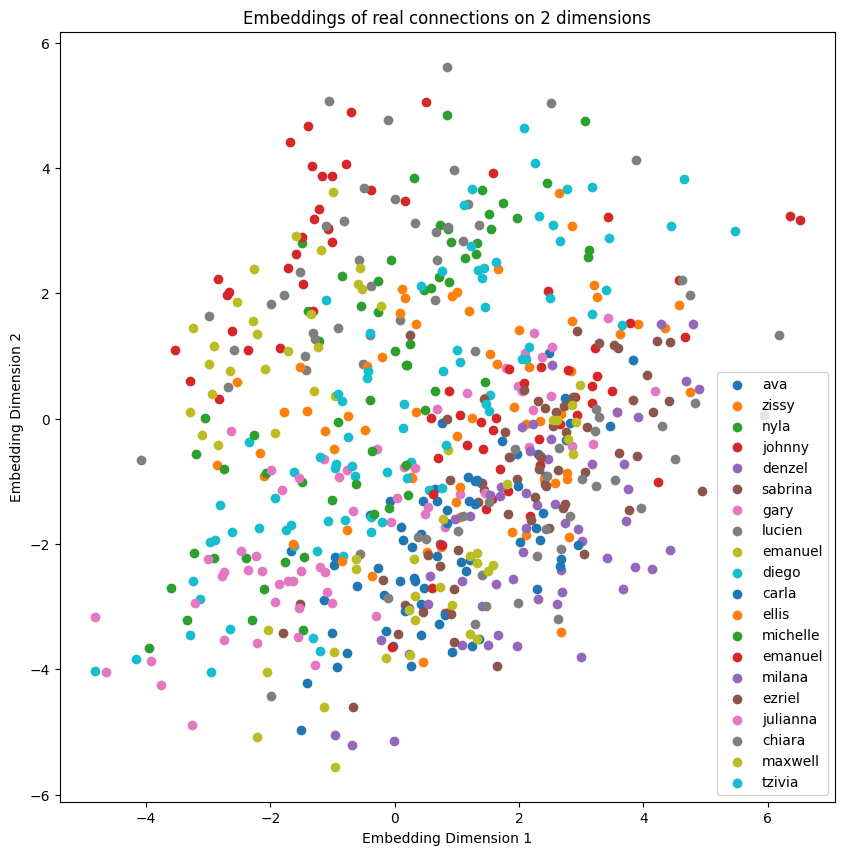

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
for login in list(people['logins']):
    login_matched_connections = connections[connections['logins']==login]
    true_login_matched_connections = login_matched_connections[login_matched_connections['true_attempt']==True]
    connections_indexes = list(true_login_matched_connections.index)
    embeddings_from_login = connection_embeddings[connections_indexes]
    first_name_person = login.split('_')[0]
    
    ax.scatter(embeddings_from_login[:,0],embeddings_from_login[:,1], label=first_name_person)

ax.set_xlabel("Embedding Dimension 1")
ax.set_ylabel("Embedding Dimension 2")
ax.set_title("Embeddings of real connections on 2 dimensions")
ax.legend()
plt.show()

# Second Plot: The histogram
## 2.1: compute the L2 distance between couples of embeddings
For each connection attempt, what is the target embedding corresponding to this login?<br>
Use the function np.linalg.norm(a-b) to find the L2 distance between a and b.<br>
You can save this distance in the table of connections afterward.

In [22]:
distances = []
for idx, connection in connections.iterrows():
    target_login = connection['logins']
    target_person = people[people['logins']==target_login]
    index_of_target_person = target_person.index[0]
    target_person_emb = people_embeddings[index_of_target_person]
    connection_emb = connection_embeddings[idx]
    
    distance = np.linalg.norm(target_person_emb-connection_emb)
    
    distances.append(distance)

connections['distance']=distances
connections.head()

,logins,passwords,ips,dates,true_attempt,distance
0,julianna_ashly@email.com,1234,45.22388.116.118,14:10:25 15-09-2021,True,23.163716
1,diego_aleena@email.com,03091965,134.37387.11.222,08:39:23 29-12-2020,True,25.197670
2,milana_syed@email.com,JSYED46,194.47049.201.211,20:26:09 03-02-2021,False,43.750481
3,emanuel_xavier@email.com,<[vf%G/(;F,81.5671.39.206,12:59:19 26-12-2019,False,43.056258
4,zissy_ronan@email.com,"J}d,",45.48120.248.39,11:38:52 12-06-2021,True,20.714565


## 2.2 Plot the histogram of all good and bad connections.
Some advices:
- The name of the function is hist
- put an alpha=0.5 to see behind histograms when they are conflicting

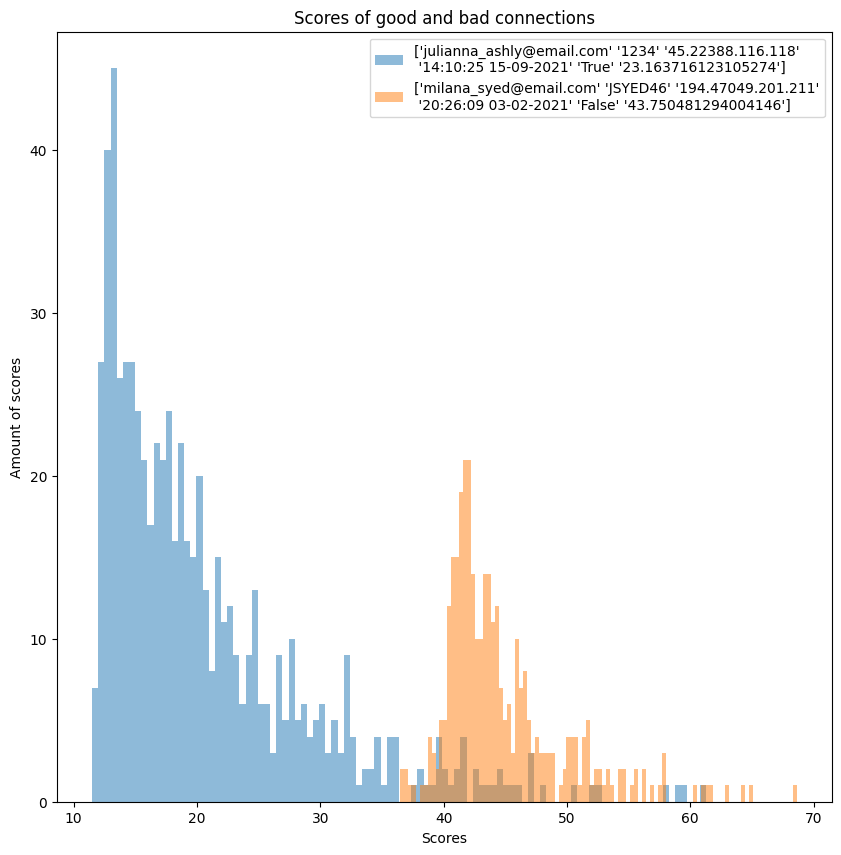

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

true_connections  = connections[connections['true_attempt']==True ]
false_connections = connections[connections['true_attempt']==False]

true_list_distances  = list( true_connections['distance'])
false_list_distances = list(false_connections['distance'])

ax.hist(true_list_distances,  label=true_connections     ,  bins=100, alpha=0.5)
ax.hist(false_list_distances,  label=false_connections , bins=100, alpha=0.5)

ax.set_title("Scores of good and bad connections")
ax.set_xlabel("Scores")
ax.set_ylabel("Amount of scores")
ax.legend()
plt.show()

# Third Plot: the ROC curve
## 3.1 Compute the TAR and FAR for 100 different tresholds.
Some advices:
- the function np.linspace() take a minimum value, a maximum value, and a number of points.
- the TAR is the number of true connections with a distance under the threshold / the number of true connections
- the FAR is the number of false connections with a distance under the threshold / the number of false connections

In [24]:
TAR, FAR = [], []
mini_distance = np.min(list(connections['distance']))
maxi_distance = np.max(list(connections['distance']))

T = np.linspace(mini_distance, maxi_distance, 100)
for t in T:
    connections_underT = connections[connections['distance']<t]
    
    N_true_underT  = len(connections_underT[connections_underT['true_attempt']==True])
    N_false_underT = len(connections_underT[connections_underT['true_attempt']==False])
    
    N_true  = len(connections[connections['true_attempt']==True])
    N_false = len(connections[connections['true_attempt']==False])
    TAR.append(N_true_underT/N_true)
    FAR.append(N_false_underT/N_false)

## 3.2 Plot the ROC Curve using the plot function

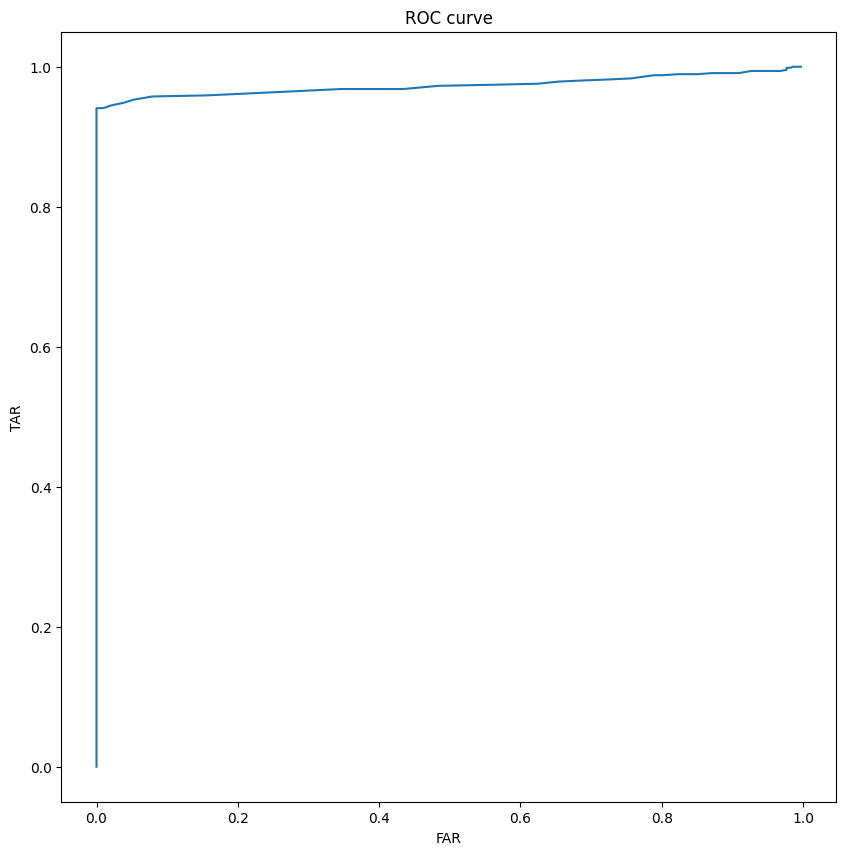

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(FAR, TAR)

ax.set_title("ROC curve")
ax.set_xlabel("FAR")
ax.set_ylabel("TAR")
plt.show()